# K-means clustering via principal component analysis

<p>This notebook demostrates k-means clustering with PCA as described in the following paper:
<p><i> Ding, Chris, and Xiaofeng He. "K-means clustering via principal component analysis." Proceedings of the twenty-first international conference on Machine learning. 2004.</i>

<small>Author: Fernando Carlos López Hernández</small>

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os
import scipy.cluster.vq as vq
import skimage.io
import sklearn.decomposition
import sklearn.preprocessing

1) Preparation:
<p> Download font images from a dataset (e.g. <a href='https://www.kaggle.com/thomasqazwsxedc/alphabet-characters-fonts-dataset'>this dataset</a>) and put them in the folder indicated in <i>image_dir</i>
<p>To reduce th execution time, it is highly recommendable to select a reduced set of, for instance, <i>images</i><=100

In [11]:
images_dir = 'letterimages/'
im_list = [images_dir + f for f in os.listdir(images_dir) if not f.startswith('.')]
n_images = len(im_list)
print('Nº of images loaded', n_images)

Nº of images loaded 66


2) Reshape the training images to create a 1D vector for each image with <i>n</i>x<i>m</i> pixels per sample, i,e., reshape the 3D array (<i>n_images</i>, <i>n</i>, <i>m</i>) to a 2D array (<i>n_images</i>, <i>n</i>x<i>m</i>)

In [12]:
im = skimage.io.imread(im_list[0]) # Open the first image to get its size
m,n = im.shape[0:2]
pixels_per_sample = n*m
X = np.array([skimage.io.imread(im).flatten() for im in im_list], dtype='f')

3) Normalization: Standardize features by removing the mean and scaling to unit variance


In [13]:
scaler = sklearn.preprocessing.StandardScaler()
Z = scaler.fit_transform(X)

4) PCA dimensionality reduction retaininig 80% of the variance

In [14]:
retained_variance = 0.8
pca = sklearn.decomposition.PCA(retained_variance)
pca.fit(Z);

5) We project the font images on the first PCs to reduce its dimensionality

In [15]:
Z_p = pca.transform(Z)
print('Size of the original vectors X = ' + str(X.shape))
print('Size of the projected vectors Z_p after PCA = ' + str(Z_p.shape))
print('Number of components before PCA = ' + str(X.shape[1]))
print('Number of components after PCA = ' + str(pca.n_components_))

Size of the original vectors X = (66, 625)
Size of the projected vectors Z_p after PCA = (66, 24)
Number of components before PCA = 625
Number of components after PCA = 24


6) We can inverse the projection and scale to view how well PCA retain the data

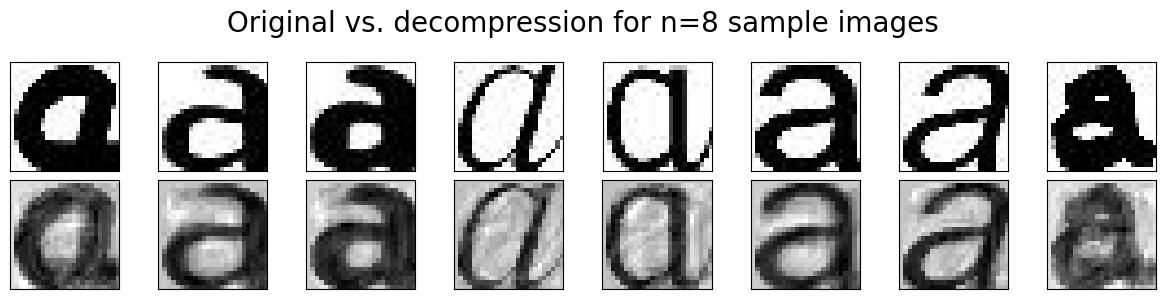

In [16]:
Z_r = pca.inverse_transform(Z_p)
X_r = scaler.inverse_transform(Z_r)
n_images = 8 # Change to view different images
i_view = range(0,n_images) 
fig, axes = plt.subplots(nrows=2, ncols=len(i_view), figsize = [12,3])
fig.suptitle('Original vs. decompression for n=%d sample images' % n_images, fontsize=20)
for i in i_view:
    col = i-i_view[0]
    axes[0,col].imshow(X[i].reshape(n,m), cmap = 'gray')
    axes[1,col].imshow(X_r[i].reshape(n,m), cmap = 'gray')
for ax in fig.axes:
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
plt.tight_layout()

7) Apply k-means on the projected samples

In [17]:
k = 9
centroids, distortion = vq.kmeans(obs = Z_p, k_or_guess = k)
labels, centroid_distances = vq.vq(Z_p, centroids)

8) Show the clusters of the images

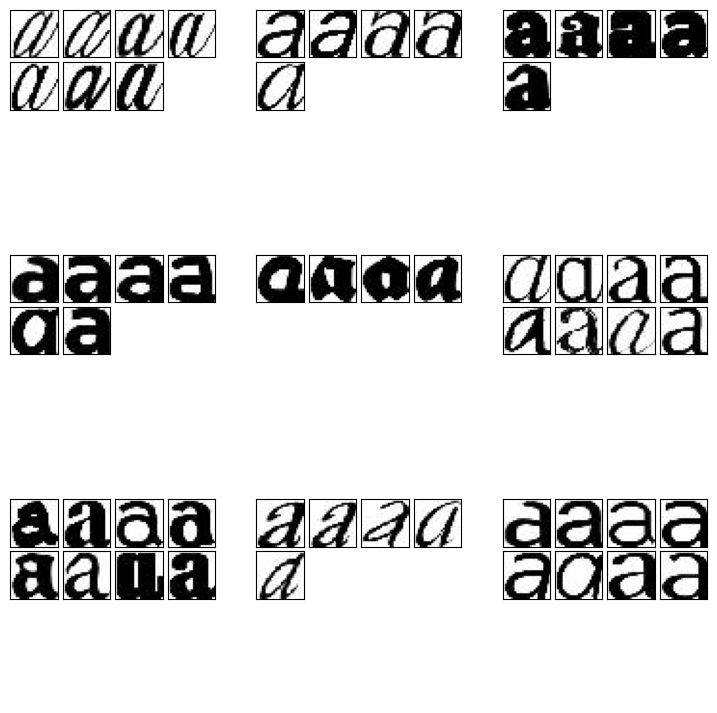

In [18]:
n_plots = np.ceil(np.sqrt(k)).astype('int')
max_cluster = np.max(np.bincount(labels))
n_subplots = np.ceil(np.sqrt(max_cluster)).astype('int')
fig, axes = plt.subplots(figsize=[9, 9])
outer = gridspec.GridSpec(n_plots, n_plots, wspace=0.2, hspace=0.2)
for k_i in range(k):
    ind = np.where(labels==k_i)[0]
    inner = gridspec.GridSpecFromSubplotSpec(n_subplots, n_subplots,subplot_spec=outer[k_i], wspace=0.1, hspace=0.1)
    for i in range(min(len(ind),n_images)):
        ax = plt.Subplot(fig, inner[i])
        ax.imshow(X[ind[i]].reshape(m,n), cmap = 'gray')
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
        fig.add_subplot(ax)
axes.axis('off');